In [198]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cmath
import pandas as pd
from scipy import stats
import lmfit
from lmfit import Model, Parameters, fit_report
from scipy.integrate import odeint


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df_C = pd.read_csv(url, index_col=0)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_R_Global = pd.read_csv(url, index_col=0)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

df_D = pd.read_csv(url, index_col=0)


1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
5/1/20     1103461
5/2/20     1132539
5/3/20     1158040
5/4/20     1180375
5/5/20     1204351
Length: 105, dtype: object


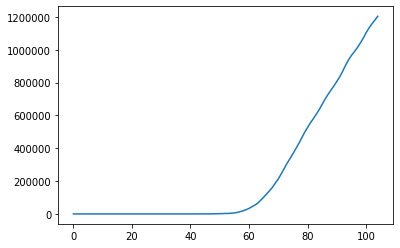

In [3]:
df_C_sum = df_C.sum(axis = 0, skipna = True)
#print(df_sum)

#df_sum.iloc[9:120].plot(y=2)

df_sum_truncate = df_C_sum.iloc[9:200]

print(df_sum_truncate)

#print(df_sum_truncate[100])

plt.plot(range(0,len(df_sum_truncate)),df_sum_truncate)


In [4]:
#print(df_R_Global)
isUS = df_R_Global['Country/Region'] == "US"
df_R =  df_R_Global[isUS]
#print(df_R)
df_R_sum = df_R.sum(axis = 0, skipna = True)
df_R_truncate = df_R_sum.iloc[3:200]

#print(df_R_truncate)

#plt.plot(range(0,len(df_R_truncate)),df_R_truncate)

In [5]:
df_sum_D = df_D.sum(axis = 0, skipna = True)

df_D_truncate = df_sum_D.iloc[10:200]

print(df_D_truncate)

#plt.plot(range(0,len(df_D_truncate)),df_D_truncate)

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
5/1/20     64943
5/2/20     66369
5/3/20     67682
5/4/20     68922
5/5/20     71064
Length: 105, dtype: object


In [6]:
N = 328000000

data_I_list = []

data_S_list = []
k_list = []

DT = 1

for i in range (0,len(df_sum_truncate)):

    I = df_sum_truncate[i] - df_R_truncate[i]-df_D_truncate[i]

    data_I_list.append(I)
    
    S = N - df_D_truncate[i]-df_R_truncate[i] - I
    
    data_S_list.append(S)
    

for i in range (1,len(df_sum_truncate)):
    
    
    DS = (data_S_list[i]-data_S_list[i-1])   
    
    if DS ==0:
        
        DT = DT+1
        
    else:
        
        k_list.append(-(DS/DT)*N/(data_S_list[i-1]*data_I_list[i-1]))
        
        DT = 1
        
    
#print(k_list)

#plt.plot(data_I_list)

#plt.plot(k_list)



In [7]:
#k_list = list(filter(lambda a: a != 0, k_list))
#k_list.loc[50:100]
stats.describe(k_list)

DescribeResult(nobs=76, minmax=(0.015625000524009162, 1.0454546410753969), mean=0.21339206505326397, variance=0.04764604188995118, skewness=1.4229418357526966, kurtosis=1.8616749614152983)

In [50]:
gamma_list = []
data_R_list = []
data_I_list = []
DT = 1

for i in range (0,len(df_sum_truncate)):

    I = df_sum_truncate[i] - df_R_truncate[i]-df_D_truncate[i]
    
    data_I_list.append(I)
    
    R = df_R_truncate[i] + df_D_truncate[i]
    
    data_R_list.append(R)

#print(data_R_list)
 
for i in range (1,len(df_sum_truncate)):

    DR = (data_R_list[i]-data_R_list[i-1])

    
    if DR == 0:
        
        DT = DT+1
        
    else:
        
        gamma_list.append(DR/(data_I_list[i-1]*DT))
        
        DT = 1
        
 
print(data_I_list)


#print(gamma_list)

#plt.plot(gamma_list)

[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 8, 8, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9, 16, 22, 40, 59, 86, 153, 196, 312, 422, 485, 672, 1065, 1504, 2085, 2789, 2836, 4192, 5947, 8579, 13706, 18893, 25096, 32860, 42704, 52380, 64101, 81429, 98523, 117507, 134726, 151871, 175617, 198032, 226335, 256087, 283164, 307109, 332842, 359167, 386825, 417106, 445412, 470784, 496239, 509267, 529645, 551520, 578062, 603750, 623366, 643094, 664694, 686733, 710372, 739243, 754786, 784027, 803916, 820514, 838291, 858222, 852481, 874503, 890788, 910206, 924273, 943496]


In [9]:
#gamma_list = list(filter(lambda a: a != 0, gamma_list))

stats.describe(gamma_list[10:100],nan_policy='omit')

DescribeResult(nobs=60, minmax=(0.002369668246445498, 0.04108027992757119), mean=0.011628212357738543, variance=4.743537673610623e-05, skewness=1.931913377422513, kurtosis=4.745158892797053)

70 76


DescribeResult(nobs=64, minmax=(0.36875001461509205, 211.00003409451767), mean=27.468145191813136, variance=1495.8804191419133, skewness=2.574395324278452, kurtosis=7.450586546439309)

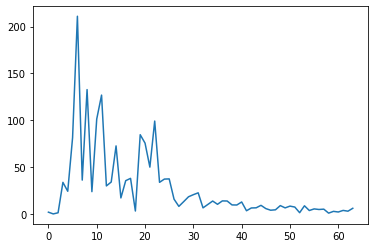

In [10]:
lg = len(gamma_list)

lk = len(k_list)

print(lg,lk)

R0 = []

for i in range (lk-lg,lg):
    #print(i)
    R0.append(k_list[i]/gamma_list[i])
    
    
    
#print(R0)

plt.plot(R0[0:100])
stats.describe(R0)

In [11]:
R0_min = 0.368

R0_max = 40

x0= 80



def plotfigure(Total_Number,K,GAMMA,Time_max, Periodic):

    S_list = []
    I_list = []
    R_list = []


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number

    S = N-1
    I = 1
    R = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I

    print(xlambda)

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)

    while running_time <time_max:
        
        #simulate event time using a random variable

        if I != 0:

########################################################################## Editted
            # Calculate rate at the top of the loop for clarity
            R0 = (R0_max - R0_min)/(1+math.exp(-k*(-running_time+x0)))+R0_min
            k = R0* gamma
            I_rate = k*I*S/N
            R_rate = gamma*I
            xlambda = I_rate + R_rate

########################################################################## Editted
            # You issues occured because your rate*timestep became larger than 1!
            # I checked this by running print(I_rate, (I_rate)/(I_rate+Rate)*arrival_time)
            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)

########################################################################## Editted           
            #What does this do??
            #periodic = math.cos(Periodic*running_time)


            a = random.random()

            #These seem redundant here!
            #I_rate = periodic*k*I*S/N
            # I_rate = k*I*S/N
            # R_rate = gamma*I
            
########################################################################## Editted
#The probability of an infection should just be I_rate/(I_rate+R_rate), no time dependence.
# This is mostly my fault for not catching it earlier! Sorry. I've never done MC using the arrival strategy
         #  if a < ((I_rate/(I_rate+R_rate))*(running_time-time[index])):

            if a < (I_rate/(I_rate+R_rate)):
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
########################################################################## Editted
#You only need an else statement because you already calculated that *some* event happens                
         #  elif a>(1-(I_rate/(I_rate+R_rate))*(running_time-time[index])):
            else:

                R=R+1
                I=I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
                
            # else:
            #     print("else")
            #     S_list.append(S)
            #     I_list.append(I)
            #     R_list.append(R)
            #     index = index+1


        else:
            break
    
    #plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    #plt.step(time,R_list,label="R")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

In [72]:
#print(I_list)

#plt.plot(data_I_list)

#plotfigure(3280000,0.2158901715648345,0.0117381410410466,365,0)

print(len(data_I_list))

105


In [98]:

def Model1(k,x0,R0_start,R0_end):

    S_list = []
    I_list = []
    R_list = []

    #set our time 
    time_max = 365 
    
    #tracking index
    index = 0
    N = 3280000

    S = N-1
    I = 1
    R = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)

    while running_time <105:
        
        #simulate event time using a random variable

        if I != 0:

########################################################################## Editted
            # Calculate rate at the top of the loop for clarity
            R0 = (R0_start - R0_end)/(1+math.exp(-k*(-running_time+x0)))+R0_end
            gamma = k/R0
            I_rate = k*I*S/N
            R_rate = gamma*I
            xlambda = I_rate + R_rate

########################################################################## Editted
            # You issues occured because your rate*timestep became larger than 1!
            # I checked this by running print(I_rate, (I_rate)/(I_rate+Rate)*arrival_time)
            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)

            #periodic = math.cos(Periodic*running_time)

            a = random.random()

            if a < (I_rate/(I_rate+R_rate)):
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
            else:

                R=R+1
                I=I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1



        else:
            break
            

    #return np.asarray(I_list,dtype=np.float32)
    #return I_list
    if (time[-1])<105:
        Model(k,x0,R0_start,R0_end)
    else:
        plt.step(time,I_list,label="I")

In [100]:
#Model1(3,30,3,0.9)

Aim: to find day one in US infection by fitting the derivative of my model with the actual data from JHU. After fitting the data, we will find X0, which is approximately the day of "lock down", match this day with the actual day of the lock down it would be easy to find the day when the patient 0 is presented.

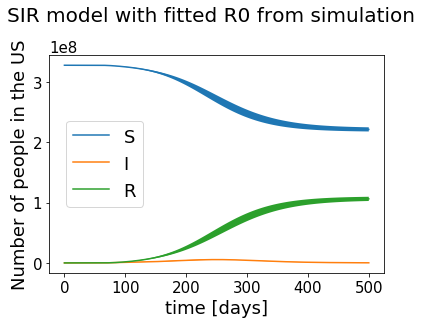

106315150.24935582
102755316.97336107
109750438.8456196


In [312]:

##best fit values

def deriv(y, t, beta, gamma, N):
    S, I, R = y

    dSdt = - beta(t) * I * S / N
    dIdt = beta(t) * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

gamma = 0.1

N = 328000000

def logistic_R0(t, R0_start, k, x0, R0_end):
    return ((R0_start - R0_end) / (1 + np.exp(-k*(-t+x0))) + R0_end)


def beta(t):
        return logistic_R0(t, R0_start, k, x0, R0_end) * gamma

R0_start, k, x0, R0_end = 2.7842, 0.1728, 73.7045, 1.2063

y0 = N-1.0, 1.0, 0.0

t = np.linspace(0, 500, 500)

ret = odeint(deriv, y0, t, args=(beta, gamma, N))

S, I, R = ret.T

##upper limit
def deriv_top(y, t, beta_top, gamma, N):
    S, I, R = y

    dSdt = - beta_top(t) * I * S / N
    dIdt = beta_top(t) * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

gamma = 0.1

N = 328000000

def logistic_R0(t, R0_start, k, x0, R0_end):
    return ((R0_start - R0_end) / (1 + np.exp(-k*(-t+x0))) + R0_end)


def beta_top(t):
        return logistic_R0(t, R0_start*(1+0.26/100), k*(1+4.17/100), x0*(1+0.35/100), R0_end*(1+0.66/100)) * gamma

ret_top = odeint(deriv_top, y0, t, args=(beta_top, gamma, N))

S_top, I_top, R_top = ret_top.T

##lower limit
def deriv_low(y, t, beta_low, gamma, N):
    S, I, R = y

    dSdt = - beta_low(t) * I * S / N
    dIdt = beta_low(t) * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

gamma = 0.1

N = 328000000

def logistic_R0(t, R0_start, k, x0, R0_end):
    return ((R0_start - R0_end) / (1 + np.exp(-k*(-t+x0))) + R0_end)


def beta_low(t):
        return logistic_R0(t, R0_start*(1-0.26/100), k*(1-4.17/100), x0*(1-0.35/100), R0_end*(1-0.66/100)) * gamma

ret_low = odeint(deriv_low, y0, t, args=(beta_low, gamma, N))

S_low, I_low, R_low = ret_low.T




plt.fill_between(t,S_top,S_low)
plt.fill_between(t,I_top,I_low)
plt.fill_between(t,R_top,R_low)




plt.plot(t, S, label = 'S')
plt.plot(t,I, label = 'I')
plt.plot(t,R, label = 'R')

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.suptitle('SIR model with fitted R0 from simulation', fontsize=20,y=1.05)
plt.xlabel('time [days]', fontsize=18)
plt.ylabel('Number of people in the US', fontsize=18)
plt.legend(bbox_to_anchor=(0.05, 0.7), loc='upper left', borderaxespad=0.,fontsize=18)

plt.show()


print(R[-1])
print(R_low[-1])
print(R_top[-1])






In [316]:
print((R[-1]-R_low[-1])/R[-1])
print((-R[-1]+R_top[-1])/R[-1])



0.03348378164020247
0.032312314737895


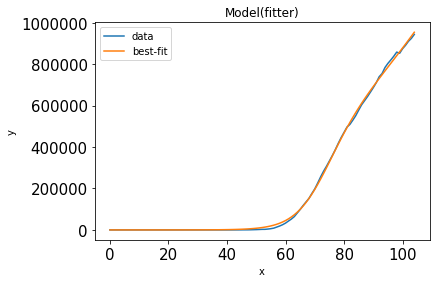

In [222]:





def Model(days, R0_start, k, x0, R0_end):

    def beta(t):
        return logistic_R0(t, R0_start, k, x0, R0_end) * gamma

    N = 328000000

    y0 = N-1.0, 1.0, 0.0
    t = np.linspace(0, days, days)
    ret = odeint(deriv, y0, t, args=(beta, gamma, N))
    S, I, R = ret.T

    R0_over_time = [beta(i)/gamma for i in range(len(t))]  # get R0 over time for plotting

    return t, S, I, R, R0_over_time




y_data = data_I_list

params_init_min_max = {"R0_start": (3.0, 2.0, 5.0), "k": (2.5, 0.01, 5.0), 
                       "x0": (30, 0, 80), "R0_end": (0.9, 0.3, 3.5)}
days = len(data_I_list)

x_data = np.linspace(0, days - 1, days, dtype=int)

#print(x_data)

def fitter(x, R0_start, k, x0, R0_end):
    ret = Model(days,R0_start, k, x0, R0_end)
    I_predicted = ret[2]
    return I_predicted[x]


mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value = init, min=mini, max=maxi, vary=True)

params = mod.make_params()

fit_method = "leastsq"

result = mod.fit(y_data, params, method = fit_method, x = x_data)

result.plot_fit(datafmt="-")

In [317]:
result.best_values

1 - result.residual.var() / np.var(y_data)




0.9995089491120628

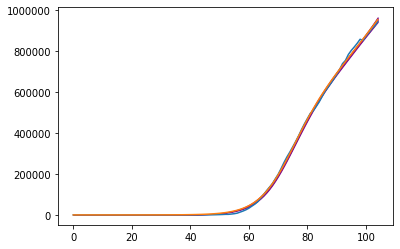

In [210]:
plt.plot(x_data,y_data)
plt.plot(x_data,result.best_fit)
uncertainty = result.eval_uncertainty(sigma = 3)
plt.fill_between(x_data,result.best_fit-uncertainty,result.best_fit+uncertainty, color='#800888')
plt.savefig('books_read.png')

In [211]:
fit_report(result)

'[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 252\n    # data points      = 105\n    # variables        = 4\n    chi-square         = 5.1840e+09\n    reduced chi-square = 51327049.0\n    Akaike info crit   = 1868.06330\n    Bayesian info crit = 1878.67915\n[[Variables]]\n    R0_start:  2.78421455 +/- 0.00715089 (0.26%) (init = 3)\n    k:         0.17276894 +/- 0.00814321 (4.71%) (init = 2.5)\n    x0:        73.7045359 +/- 0.25475183 (0.35%) (init = 30)\n    R0_end:    1.20630833 +/- 0.00791780 (0.66%) (init = 0.9)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(R0_start, k)      = -0.919\n    C(R0_start, x0)     = -0.913\n    C(k, R0_end)        =  0.852\n    C(k, x0)            =  0.698\n    C(R0_start, R0_end) = -0.655\n    C(x0, R0_end)       =  0.294'

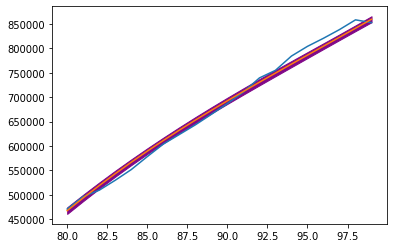

In [212]:
plt.plot(x_data[80:100],y_data[80:100])
plt.plot(x_data[80:100],result.best_fit[80:100])
uncertainty = result.eval_uncertainty(sigma = 3)
plt.fill_between(x_data[80:100],(result.best_fit-uncertainty)[80:100],(result.best_fit+uncertainty)[80:100], color='#800888')
plt.savefig('books_read.png')


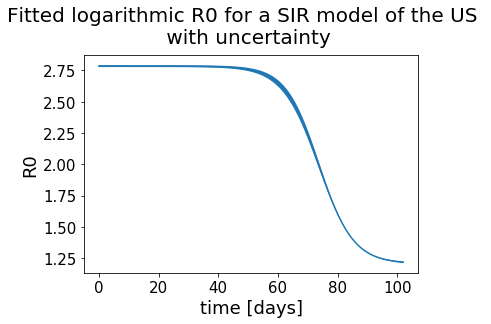

In [328]:
x = np.arange(0,103)

y = logistic_R0(x, 2.7842, 0.1728, 73.7045, 1.2063)
y_plus = beta_top(x) /0.1
y_minus = beta_low(x) /0.1

plt.fill_between(x,y_minus,y_plus)
plt.plot(x,y)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.suptitle('Fitted logarithmic R0 for a SIR model of the US \n with uncertainty', fontsize=20,y=1.05)
plt.xlabel('time [days]', fontsize=18)
plt.ylabel('R0', fontsize=18)
plt.show()



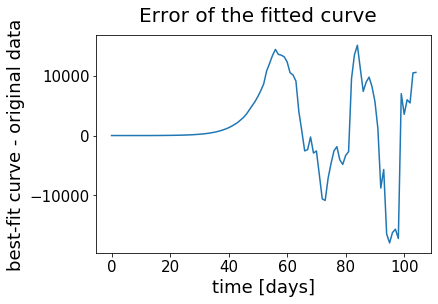

In [217]:
plt.plot(x_data,result.best_fit-y_data)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.suptitle('Error of the fitted curve', fontsize=20)
plt.xlabel('time [days]', fontsize=18)
plt.ylabel('best-fit curve - original data', fontsize=18)
plt.show()




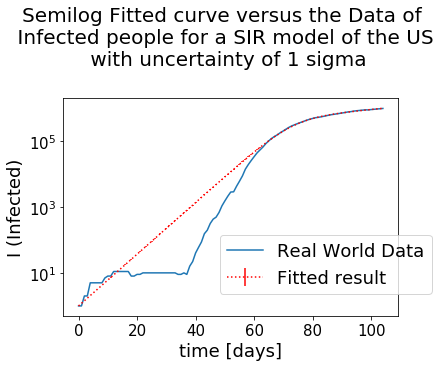

In [282]:
plt.plot(x_data,y_data,label = "Real World Data")
#plt.plot(x_data,result.best_fit, label = "Fitted result",linestyle = "dotted",color = "r")

uncertainty = result.eval_uncertainty(sigma = 1)
#plt.fill_between(x_data,result.best_fit-uncertainty,result.best_fit+uncertainty, color='r')

#plt.semilogy(x_data, y_data)
plt.errorbar(x_data, result.best_fit, yerr=uncertainty,label = "Fitted result",linestyle = "dotted",color = "r")

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.suptitle('Semilog Fitted curve versus the Data of \n Infected people for a SIR model of the US \n with uncertainty of 1 sigma', fontsize=20,y=1.2)
plt.xlabel('time [days]', fontsize=18)
plt.ylabel('I (Infected)', fontsize=18)
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='lower right', borderaxespad=0.,fontsize=18)

plt.yscale('log')


plt.show()